In [16]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [17]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [18]:
def preprocess_images(dataset_path, image_size=(28, 28)):
    data = []
    labels = []

    # Loop through each directory (digit/letter folder)
    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)

        if os.path.isdir(folder_path):
            # Loop through each image in the folder
            for image_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_name)

                # Read the image
                image = cv2.imread(image_path)

                # Convert the image to grayscale
                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # Resize the image to the desired size (e.g., 28x28 for MNIST-like data)
                resized_image = cv2.resize(gray_image, image_size)

                # Thresholding (convert to binary image)
                _, binary_image = cv2.threshold(resized_image, 128, 255, cv2.THRESH_BINARY)

                # Optionally apply more advanced preprocessing (erosion, dilation, etc.)
                kernel = np.ones((3, 3), np.uint8)
                eroded_image = cv2.erode(binary_image, kernel, iterations=1)
                dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)

                # Flatten the image and append to data
                data.append(dilated_image.flatten())
                
                # Append the label (digit/letter)
                labels.append(folder_name)

    return np.array(data), np.array(labels)


In [19]:
# Define the dataset path
dataset_path = r'asl_dataset\asl_dataset'


# Preprocess the images
X, y = preprocess_images(dataset_path)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, scale pixel values (normalize between 0 and 1)
X_train = X_train / 255.0
X_test = X_test / 255.0


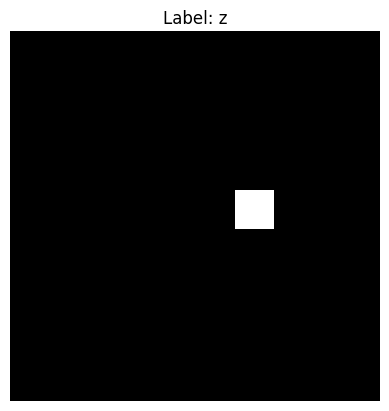

In [22]:
# Function to display the image
def display_image(image_data, label, image_size=(28, 28)):
    # Reshape the flat image data back to its 2D form
    image = image_data.reshape(image_size)

    # Display the image
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Display a sample preprocessed image from the training set
display_image(X_train[0], y_train[0])